<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Linear_Regression_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a Linear Regression problem with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# 1. Create an artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 3
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [3]:
X, y, coef = make_regression(n_samples=200, n_features=1,
                                      n_informative=1, noise=20,
                                      coef=True, random_state=10,)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(200, 1)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.3 Data visualization

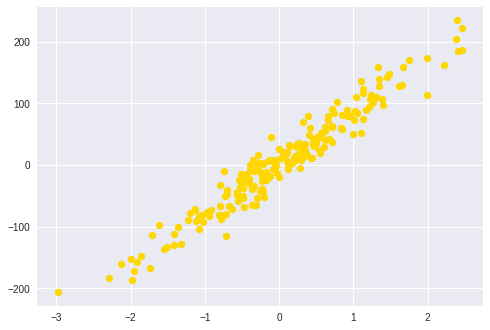

In [4]:
plt.scatter(X, y, color='gold')

### 1.4 Checking the shape of the input data

In [5]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(134, 1)
y_train:	(134,)
x_test:		(66, 1)
y_test:		(66,)


# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 20 #
learning_rate = 0.03
batch_size = 16

### 2.2 Creating a model

In [7]:
def baseline_model():
  model = Sequential()
  model.add(Dense(1, activation = 'linear', input_dim = 1,kernel_initializer='glorot_uniform',))
  model.compile(optimizer=SGD(learning_rate), loss = 'mse', metrics = ['mse'])
  return model

model = baseline_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [8]:
results =  model.fit(
           X_train, y_train,
           epochs= training_epochs,
           batch_size = batch_size,
           validation_data = (X_test, y_test),
           verbose = 1
)

Instructions for updating:
Use tf.cast instead.
Train on 134 samples, validate on 66 samples
Epoch 1/20
134/134 [==============================] - 0s 698us/step - loss: 4989.4867 - mean_squared_error: 4989.4867 - val_loss: 2300.6428 - val_mean_squared_error: 2300.6428
Epoch 2/20
134/134 [==============================] - 0s 118us/step - loss: 2010.4737 - mean_squared_error: 2010.4737 - val_loss: 994.7760 - val_mean_squared_error: 994.7760
Epoch 3/20
134/134 [==============================] - 0s 110us/step - loss: 944.9854 - mean_squared_error: 944.9854 - val_loss: 540.7735 - val_mean_squared_error: 540.7735
Epoch 4/20
134/134 [==============================] - 0s 95us/step - loss: 583.1388 - mean_squared_error: 583.1388 - val_loss: 402.8745 - val_mean_squared_error: 402.8745
Epoch 5/20
134/134 [==============================] - 0s 117us/step - loss: 461.2516 - mean_squared_error: 461.2516 - val_loss: 364.6794 - val_mean_squared_error: 364.6794
Epoch 6/20
134/134 [======================

### 2.4 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict(X_test)

### 2.5 Display the weights and biases of our model

In [10]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("Input layer weights",weights.shape,":\n",weights)
print("Input layer biases",biases.shape,":\n",biases)

Input layer weights (1, 1) :
 [[83.097404]]
Input layer biases (1,) :
 [0.97422475]


# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

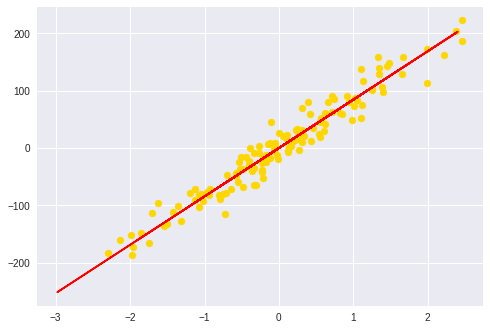

In [11]:
plt.scatter(X_train, y_train, color='gold')
yy = coef*X_test
plt.plot(X_test,yy,'r')

### 3.2 Visualization of the model predictions on our test set

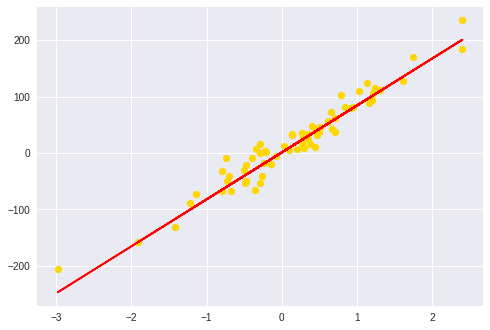

In [12]:
plt.scatter(X_test, y_test, color='gold')
plt.plot(X_test,prediction_values,'r')